In [ ]:
import torch 
import torch.optim as optim
import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset
import numpy as np
# import xResNet as m
import Inception1d as m
import Preprocessing as P
from tqdm import tqdm

#hyperparameters
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
path = "First-edition\\"
sampling_rate = 100
num_eporch = 15
thresh_hold = 0.5

#network
net = m.inception1d().float()
# net = m.xresnet1d50_deeper().float() #could be other types of xresnet, see xResNet.py for more info


criterion = nn.functional.binary_cross_entropy_with_logits
optimizer = optim.Adam(net.parameters(), lr=0.001)

#data
data = P.Preprocessing(path,sampling_rate,experiment="diagnostic_superclass")

X = data.get_data_x()
x_train = np.concatenate((X[0][0],X[0][1],X[0][2]),axis = 1)
x_train = torch.from_numpy(x_train)

x_val = np.concatenate((X[1][0],X[1][1],X[1][2]),axis = 1)
x_val = torch.from_numpy(x_val)

x_test = np.concatenate((X[2][0],X[2][1],X[2][2]),axis = 1)
x_test = torch.from_numpy(x_test)

Y = data.get_data_y()
y_train = torch.from_numpy(Y[0])
y_val = torch.from_numpy(Y[1])
y_test = torch.from_numpy(Y[2])


Sle = data.get_data_metadata()

#dataloader
train_data = DataLoader(TensorDataset(x_train,y_train), batch_size=32, shuffle=True)

val_data = DataLoader(TensorDataset(x_val,y_val), batch_size = 32, shuffle=False)

test_data = DataLoader(TensorDataset(x_test,y_test), batch_size = 32, shuffle=False)


In [2]:
import xResNet as m
net = m.xresnet1d50_deeper().float()
#with inception, it takes 3 minutes to finish an epoch on my lovely thingy
net.to(device)
#storing stuff for matplotlib
epoch_train_loss = []
epoch_train_acc = []
epoch_val_loss = []
epoch_val_acc = []

for epoch in tqdm(range(num_eporch)):
    net.train()
    train_loss = []
    train_acc = []
    val_loss = []
    val_acc = []
    print("Epoch {}:/n-----------------------------------------------------------".format(epoch +1)) 
    
    for inputs, labels in tqdm(train_data):
        inputs, labels = inputs.to(device),labels.to(device)
        running_loss = 0.0
        optimizer.zero_grad()
        # forward + backward + optimize
        outputs = net(inputs.float())
        outputs.to(device)
        loss = criterion(outputs, (labels.float()))
        loss.backward()
        optimizer.step()
        
        pred = outputs.cpu().detach().numpy() > thresh_hold
        acc = (pred == labels.cpu().detach().numpy()).sum()/(inputs.shape[0]*5)
        
        running_loss += loss.item()
        train_loss.append(loss.item())
        train_acc.append(acc)
        # print("epoch{}: loss per batch:{:.4f}".format(epoch+1, running_loss))
        # print("Accuracy of epoch{} per batch:{}".format(epoch+1, acc*100))
        # the above two lines are for those who want to burn your own eyes
    print("========================================================")
    epoch_train_acc.append(sum(train_acc)/len(train_acc))
    epoch_train_loss.append(sum(train_loss)/len(train_loss))
    print("Train loss of epoch {}:{:.4f}".format(epoch+1, epoch_train_loss[-1]))    
    print("Train accuracy of epoch {}:{:}".format(epoch+1, epoch_train_acc[-1]))

    with torch.no_grad():
        net.eval()
        running_loss = 0.0
        batch_val = []
        for inputs, labels in tqdm(val_data):
            inputs, labels = inputs.cuda(),labels.cuda()
            # forward + backward + optimize
            outputs = net(inputs.float())
            loss = criterion(outputs, labels.float())
            
            pred = outputs.cpu().detach().numpy() > thresh_hold
            acc = (pred == labels.cpu().detach().numpy()).sum()/(inputs.shape[0]*5)
            batch_val.append(acc)
            running_loss += loss.item()
            val_loss.append(loss.item())
            val_acc.append(acc)
    epoch_val_loss.append(sum(val_loss)/len(val_loss))
    epoch_val_acc.append(sum(val_acc)/len(val_acc))
    print("========================================================")
    print("Validation loss of epoch {}:{:.4f}".format(epoch+1, epoch_val_loss[-1]))    
    print("Validation accuracy of epoch {}:{:}".format(epoch+1, epoch_val_acc[-1]))

print("\nfinished training =================================================")




  0%|          | 0/15 [00:00<?, ?it/s]

Epoch 1:/n-----------------------------------------------------------


100%|██████████| 545/545 [00:47<00:00, 11.47it/s]


Train loss of epoch 1:0.8049
Train accuracy of epoch 1:0.6234105504587161


  7%|▋         | 1/15 [00:49<11:30, 49.31s/it]

Validation loss of epoch 1:0.7833
Validation accuracy of epoch 1:0.6431288819875778
Epoch 2:/n-----------------------------------------------------------


100%|██████████| 545/545 [00:43<00:00, 12.64it/s]


Train loss of epoch 2:0.8043
Train accuracy of epoch 2:0.6252637614678899


 13%|█▎        | 2/15 [01:34<10:07, 46.70s/it]

Validation loss of epoch 2:0.7862
Validation accuracy of epoch 2:0.6414078674948238
Epoch 3:/n-----------------------------------------------------------


100%|██████████| 545/545 [00:42<00:00, 12.96it/s]


Train loss of epoch 3:0.8055
Train accuracy of epoch 3:0.6270068807339451


 20%|██        | 3/15 [02:17<09:04, 45.37s/it]

Validation loss of epoch 3:0.7797
Validation accuracy of epoch 3:0.649016563146998
Epoch 4:/n-----------------------------------------------------------


100%|██████████| 545/545 [00:41<00:00, 13.09it/s]


Train loss of epoch 4:0.8031
Train accuracy of epoch 4:0.6253050458715598


 27%|██▋       | 4/15 [03:01<08:10, 44.59s/it]

Validation loss of epoch 4:0.7824
Validation accuracy of epoch 4:0.643853519668737
Epoch 5:/n-----------------------------------------------------------


100%|██████████| 545/545 [00:41<00:00, 13.27it/s]


Train loss of epoch 5:0.8079
Train accuracy of epoch 5:0.6226077981651377


 33%|███▎      | 5/15 [03:44<07:19, 43.95s/it]

Validation loss of epoch 5:0.7854
Validation accuracy of epoch 5:0.6467650103519667
Epoch 6:/n-----------------------------------------------------------


100%|██████████| 545/545 [00:41<00:00, 13.18it/s]


Train loss of epoch 6:0.8042
Train accuracy of epoch 6:0.6254220183486235


 40%|████      | 6/15 [04:27<06:33, 43.68s/it]

Validation loss of epoch 6:0.7944
Validation accuracy of epoch 6:0.6331651138716354
Epoch 7:/n-----------------------------------------------------------


100%|██████████| 545/545 [00:42<00:00, 12.79it/s]


Train loss of epoch 7:0.8042
Train accuracy of epoch 7:0.6244495412844038


 47%|████▋     | 7/15 [05:11<05:51, 43.89s/it]

Validation loss of epoch 7:0.7728
Validation accuracy of epoch 7:0.6517339544513459
Epoch 8:/n-----------------------------------------------------------


100%|██████████| 545/545 [00:48<00:00, 11.30it/s]


Train loss of epoch 8:0.8061
Train accuracy of epoch 8:0.6222178899082561


 53%|█████▎    | 8/15 [06:02<05:21, 45.95s/it]

Validation loss of epoch 8:0.7707
Validation accuracy of epoch 8:0.6555383022774329
Epoch 9:/n-----------------------------------------------------------


100%|██████████| 545/545 [00:43<00:00, 12.56it/s]


Train loss of epoch 9:0.8040
Train accuracy of epoch 9:0.6236582568807338


 60%|██████    | 9/15 [06:47<04:34, 45.72s/it]

Validation loss of epoch 9:0.7876
Validation accuracy of epoch 9:0.643957039337474
Epoch 10:/n-----------------------------------------------------------


100%|██████████| 545/545 [00:42<00:00, 12.68it/s]


Train loss of epoch 10:0.8041
Train accuracy of epoch 10:0.6253211009174314


 67%|██████▋   | 10/15 [07:32<03:47, 45.43s/it]

Validation loss of epoch 10:0.7810
Validation accuracy of epoch 10:0.6438017598343686
Epoch 11:/n-----------------------------------------------------------


100%|██████████| 545/545 [00:43<00:00, 12.54it/s]


Train loss of epoch 11:0.8033
Train accuracy of epoch 11:0.6241697247706424


 73%|███████▎  | 11/15 [08:17<03:01, 45.39s/it]

Validation loss of epoch 11:0.7690
Validation accuracy of epoch 11:0.6537655279503103
Epoch 12:/n-----------------------------------------------------------


100%|██████████| 545/545 [00:43<00:00, 12.64it/s]


Train loss of epoch 12:0.8034
Train accuracy of epoch 12:0.6242155963302752


 80%|████████  | 12/15 [09:02<02:15, 45.24s/it]

Validation loss of epoch 12:0.7808
Validation accuracy of epoch 12:0.6441252587991718
Epoch 13:/n-----------------------------------------------------------


100%|██████████| 545/545 [00:42<00:00, 12.81it/s]


Train loss of epoch 13:0.8053
Train accuracy of epoch 13:0.6244518348623851


 87%|████████▋ | 13/15 [09:46<01:29, 44.99s/it]

Validation loss of epoch 13:0.7860
Validation accuracy of epoch 13:0.6422619047619048
Epoch 14:/n-----------------------------------------------------------


100%|██████████| 545/545 [00:42<00:00, 12.80it/s]


Train loss of epoch 14:0.8042
Train accuracy of epoch 14:0.6246444954128436


 93%|█████████▎| 14/15 [10:31<00:44, 44.81s/it]

Validation loss of epoch 14:0.7785
Validation accuracy of epoch 14:0.648835403726708
Epoch 15:/n-----------------------------------------------------------


100%|██████████| 545/545 [00:42<00:00, 12.93it/s]


Train loss of epoch 15:0.8067
Train accuracy of epoch 15:0.6246353211009169


100%|██████████| 15/15 [11:15<00:00, 45.00s/it]

Validation loss of epoch 15:0.7889
Validation accuracy of epoch 15:0.6361154244306418

finished training =================================================


In [3]:
#here should lie the testing code
test_loss = []
test_acc = []
with torch.no_grad():
    net.eval()
    running_loss = 0.0
    batch_test = []
    for inputs, labels in tqdm(test_data):
        inputs, labels = inputs.to(device),labels.to(device)
        outputs = net(inputs.float())
        outputs.to(device)
        loss = criterion(outputs, labels.float())
        pred = outputs.cpu().detach().numpy() > thresh_hold
        acc = (pred == labels.cpu().detach().numpy()).sum()/(inputs.shape[0]*5)
        batch_test.append(acc)
        running_loss += loss.item()
        test_loss.append(loss.item())
        test_acc.append(acc)
print("========================================================")
print("Test loss:{:.4f}".format(sum(test_loss)/len(test_loss)))    
print("Test accuracy:{:}".format(sum(batch_test)/len(batch_test)))

100%|██████████| 69/69 [00:02<00:00, 28.92it/s]

Test loss:0.8057
Test accuracy:0.6221920289855071


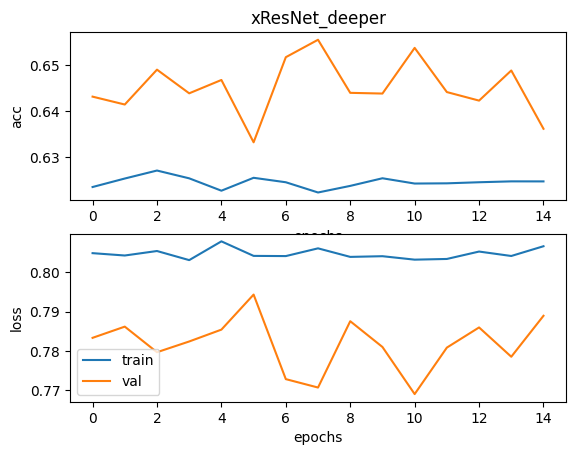

In [9]:
import matplotlib.pyplot as plt
#visualize
figure, axis = plt.subplots(2)
#accuracy plot
axis[0].set_title('xResNet_deeper')
axis[0].plot(epoch_train_acc,label='train_acc')
axis[0].plot(epoch_val_acc,label='val_acc')
axis[0].set_xlabel('epochs')
axis[0].set_ylabel('acc')


axis[1].plot(epoch_train_loss,label='train')
axis[1].plot(epoch_val_loss,label='val')
axis[1].set_xlabel('epochs')
axis[1].set_ylabel('loss')

plt.savefig("xResNet_deeper.jpg")
plt.legend()
plt.show()